In [1]:
import json
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''urls'''
url_percentual_casos_violencia_sexo = 'http://sage.saude.gov.br/graficos/violencia/violenciaPorSexo.php?output=json' #http://dados.gov.br/dataset/mspainelsage_73/resource/e8ef018b-14cf-4507-ab06-2d19ce268ea0
url_percentual_casos_violencia_etaria = 'http://sage.saude.gov.br/graficos/violencia/violenciaPorFaixaEtaria.php?output=json' #http://dados.gov.br/dataset/mspainelsage_73/resource/a2411625-5308-4b32-8a6f-d591693625e7
url_percentual_casos_violencia_raçaCor = 'http://sage.saude.gov.br/graficos/violencia/violenciaCasosRacaCor.php?output=json' #http://dados.gov.br/dataset/mspainelsage_73/resource/77170647-4a23-4443-a120-9ea84750e7d4

In [3]:
'''funções'''
linhas = lambda n: len(n)//4 if len(n)%4==0 else len(n)//4+1
def df_json_sage(url):
    data = json.loads(urllib.request.urlopen(url).read().decode('utf-8'))
    temp = pd.DataFrame(data['resultset'])
    temp.columns=([data['metadata'][x[0]]['colName'] for x in enumerate(data['metadata'])])
    temp = temp.set_index('Ano', drop=True)
    temp.index = pd.to_numeric(temp.index)
    return temp
def torta(data):    
    plt.figure()
    for x,y in enumerate(data.T.columns):    
        plt.subplot(linhas(data.T.columns),4,x+1)        
        plt.pie(data.T[y],labels=data.T[y].index)    
        plt.title(y)
    plt.show()
def evolução_percentual(serie):
    serie = pd.to_numeric(serie)
    return pd.Series([1-(serie.iloc[x]/serie.iloc[0]) for x,y in enumerate(serie)], index = pd.to_datetime(serie.index, yearfirst=True, format='%Y'))
def linhas_g(data,título='Não informado'):
    plt.figure()
    for x in data.columns:
        evolução_percentual(data[x]).plot(label=x)
        plt.title(título)
        plt.legend(loc=3, prop={'size':6})
    plt.show()

In [4]:
'''Primeiros quadros:
data_1 = Violência por sexo, não definido pela SAGE
data_2 = Violência por faixa etária 
data_3 = Violência por raça/cor'''
data_1 = df_json_sage(url_percentual_casos_violencia_sexo)
data_2 = df_json_sage(url_percentual_casos_violencia_etaria)
data_3 = df_json_sage(url_percentual_casos_violencia_raçaCor)


In [5]:
'''Juntando tabelas nos anos'''
temp_1 = data_2.join(data_1, how='outer')
temp_1.head()
final = data_3.join(temp_1, how='outer')


In [6]:
final

,Branca,Amarela,Ignorada,Indígena,Parda,Preta,0-09 Anos,10-19 Anos,20-59 Anos,60e+,masculino,feminino
Ano,,,,,,,,,,,,
2009,38.54,0.61,25.48,0.45,28.07,6.86,19.58,26.85,48.62,4.93,33.47,66.44
2010,40.69,0.78,22.04,0.59,28.49,7.41,18.22,25.44,51.44,4.87,33.37,66.49
2011,41.24,0.70,20.75,0.50,29.05,7.76,16.69,26.77,51.37,5.15,30.15,69.77
2012,41.65,0.59,18.11,0.53,31.26,7.86,16.84,26.86,50.63,5.66,30.53,69.42
2013,40.11,0.69,16.79,0.79,33.86,7.76,15.82,26.85,51.27,6.03,29.90,70.03
2014,40.15,0.61,15.33,0.91,35.11,7.89,14.70,24.84,54.73,5.70,33.92,66.00
2015,41.51,0.59,13.15,0.98,35.92,7.86,14.52,24.02,55.47,6.96,33.00,66.95


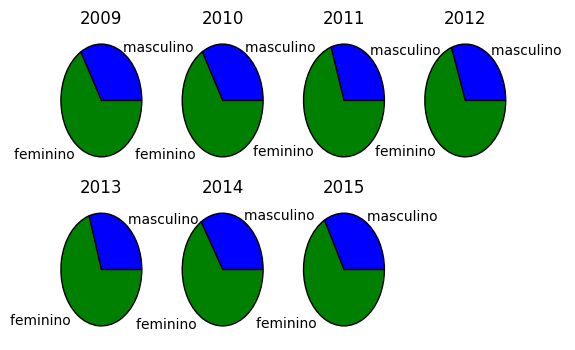

In [7]:
torta(data_1)

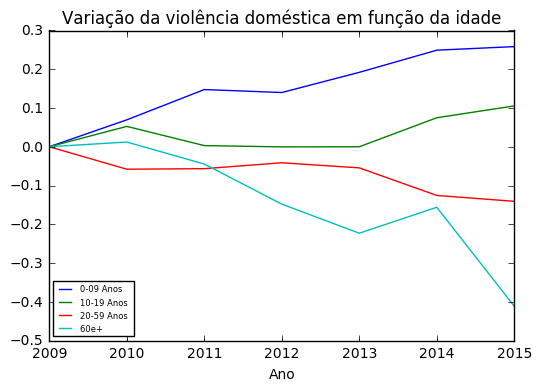

In [8]:
linhas_g(data_2,'Variação da violência doméstica em função da idade')

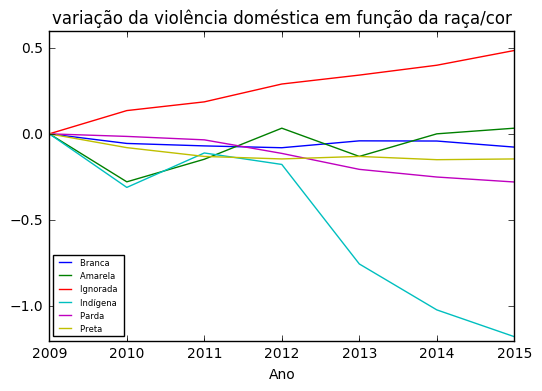

In [9]:
linhas_g(data_3, 'variação da violência doméstica em função da raça/cor')

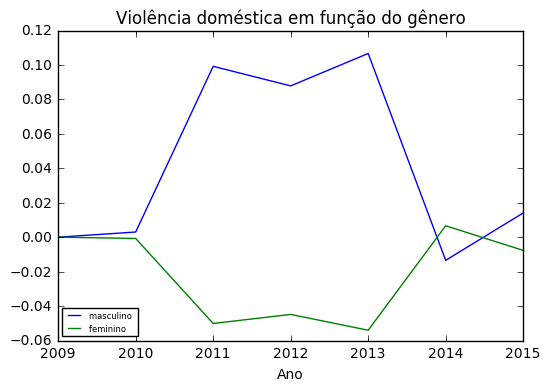

In [10]:
linhas_g(data_1,'Violência doméstica em função do gênero')

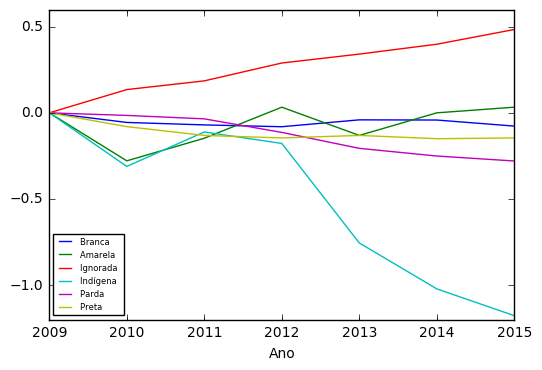

In [11]:
plt.figure()
for x in data_3.columns:
    evolução_percentual(data_3[x]).plot(label=x)
    plt.legend(loc=3, prop={'size':6})
plt.show()